In [104]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterWarnings('ignore')


AttributeError: module 'warnings' has no attribute 'filterWarnings'

Here we will be experimenting with 
DecisionTree Algorithm

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [106]:
df = pd.read_csv("C:\\Users\\sreeram krishna\\Downloads\\Heart attack (1).csv")

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        333 non-null    int64  
 1   sex        333 non-null    int64  
 2   chol       333 non-null    int64  
 3   sugar      333 non-null    int64  
 4   Onset(P)   333 non-null    int64  
 5   Peak(QRS)  333 non-null    int64  
 6   Offset(T)  333 non-null    int64  
 7   cp         333 non-null    int64  
 8   BP         333 non-null    int64  
 9   talassemi  333 non-null    int64  
 10  haemorrha  333 non-null    int64  
 11  cp.1       333 non-null    int64  
 12  BP.1       333 non-null    int64  
 13  restecg    333 non-null    int64  
 14  thalach    333 non-null    int64  
 15  oldpeak    333 non-null    float64
 16  slope      333 non-null    int64  
 17  calcium    333 non-null    int64  
 18  target     333 non-null    int64  
dtypes: float64(1), int64(18)
memory usage: 49.6 KB


In [108]:
df.describe()

,age,sex,chol,sugar,Onset(P),Peak(QRS),Offset(T),cp,BP,talassemi,haemorrha,cp.1,BP.1,restecg,thalach,oldpeak,slope,calcium,target
count,333.00000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,54.33033,0.690691,243.618619,0.393393,0.705706,0.909910,0.957958,0.891892,133.102102,2.144144,0.492492,0.975976,133.102102,0.543544,148.570571,1.200901,1.384384,1.090090,0.519520
std,12.63096,0.462904,54.300441,0.495356,0.578634,0.759076,0.805500,1.015109,20.357389,0.906936,0.500696,1.046808,20.357389,0.533850,22.808236,1.158663,0.613107,1.077281,0.500371
min,17.00000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,94.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,46.00000,0.000000,207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,2.000000,0.000000,0.000000,120.000000,0.000000,132.000000,0.200000,1.000000,0.000000,0.000000
50%,55.00000,1.000000,239.000000,0.000000,1.000000,1.000000,1.000000,1.000000,130.000000,2.000000,0.000000,1.000000,130.000000,1.000000,152.000000,1.000000,1.000000,1.000000,1.000000
75%,61.00000,1.000000,274.000000,1.000000,1.000000,1.000000,2.000000,2.000000,140.000000,3.000000,1.000000,2.000000,140.000000,1.000000,165.000000,1.900000,2.000000,2.000000,1.000000
max,110.00000,1.000000,564.000000,2.000000,2.000000,3.000000,3.000000,3.000000,300.000000,3.000000,1.000000,3.000000,300.000000,2.000000,202.000000,6.200000,2.000000,4.000000,1.000000


##feature selection

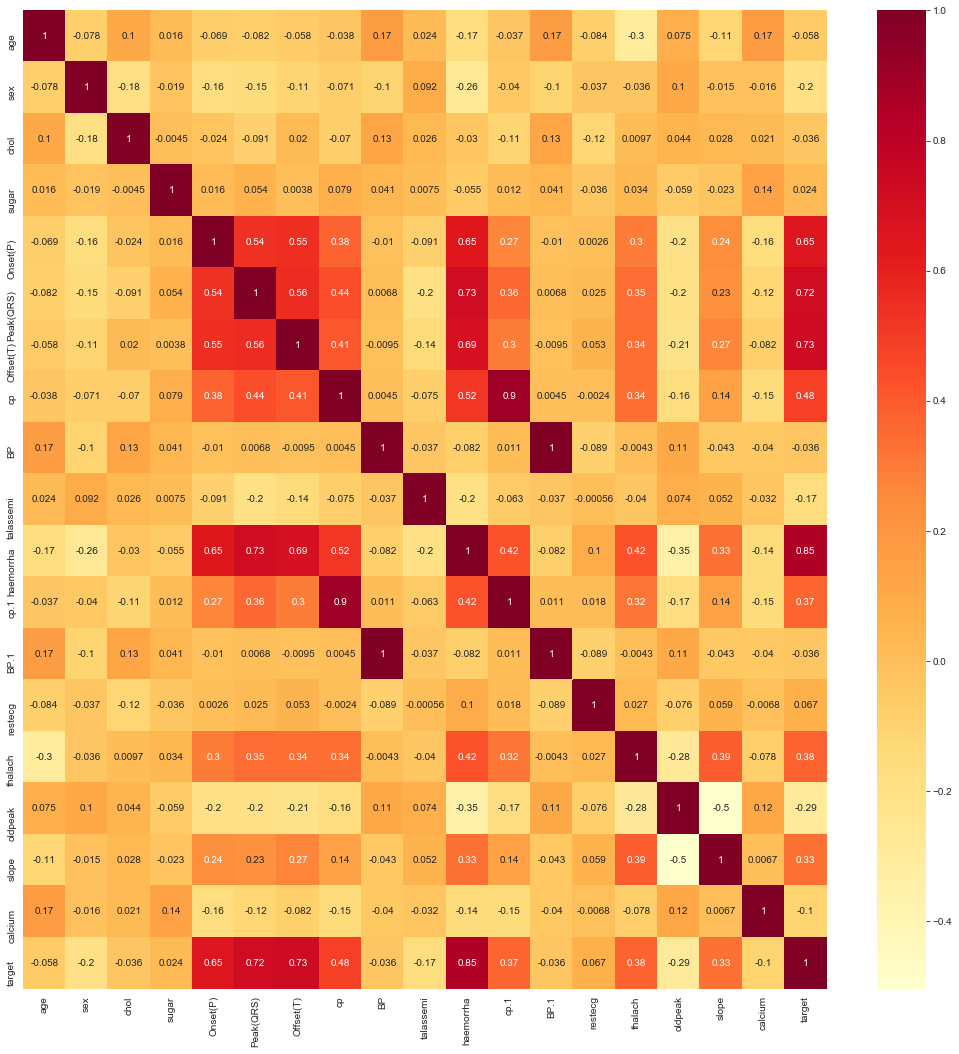

In [109]:
import seaborn as sns
#get correlations of each feature as dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlOrRd")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7C7230C08>,
      dtype=object)

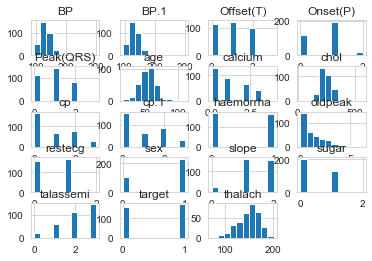

In [110]:
df.hist()

#its always a good practice with dataset then we get an idea where target classes of approprite equalsize.


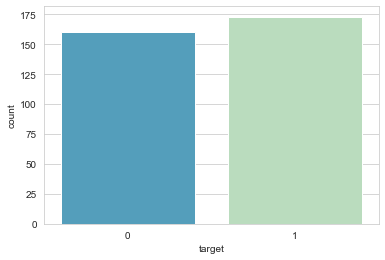

In [111]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='GnBu_r')

#after observing the dataset i need to conver catogorical features into dummy variables


In [112]:
dataset = pd.get_dummies(df, columns = ['sex','cp','restecg','slope','calcium','haemorrha'])

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale = ['age','chol','sugar','Onset(P)','Peak(QRS)','Offset(T)','BP','thalach','oldpeak']
dataset[columns_to_scale] = StandardScaler.fit_transform(dataset[columns_to_scale])

In [114]:
dataset.head()

,age,chol,sugar,Onset(P),Peak(QRS),Offset(T),BP,talassemi,cp.1,BP.1,...,slope_0,slope_1,slope_2,calcium_0,calcium_1,calcium_2,calcium_3,calcium_4,haemorrha_0,haemorrha_1
0,1.242443,-0.712273,1.226429,2.240178,1.438236,1.295606,0.536134,2,3,144,...,1,0,0,0,1,0,0,0,0,1
1,0.845995,-0.435616,1.226429,2.240178,1.438236,1.295606,-0.251004,1,2,128,...,1,0,0,0,1,0,0,0,0,1
2,0.132388,-0.251179,-0.795358,2.240178,1.438236,1.295606,4.275041,2,1,220,...,0,0,1,1,0,0,0,0,0,1
3,0.211677,2.035849,1.226429,0.509368,0.118862,1.295606,8.210732,1,0,300,...,0,0,1,1,0,0,0,0,0,1
4,-2.563462,-0.952042,-0.795358,0.509368,0.118862,1.295606,0.339350,1,0,140,...,0,1,0,1,0,0,0,0,0,1


In [115]:
y = dataset ['target']
x = dataset [['age','chol','sugar','Onset(P)','Peak(QRS)','Offset(T)','BP','thalach','oldpeak','talassemi']]
features=list(dataset.columns[:10])
print(features)

['age', 'chol', 'sugar', 'Onset(P)', 'Peak(QRS)', 'Offset(T)', 'BP', 'talassemi', 'cp.1', 'BP.1']


In [116]:
model=tree.DecisionTreeClassifier(criterion='entropy',splitter='random')
model=model.fit(x,y)

In [117]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

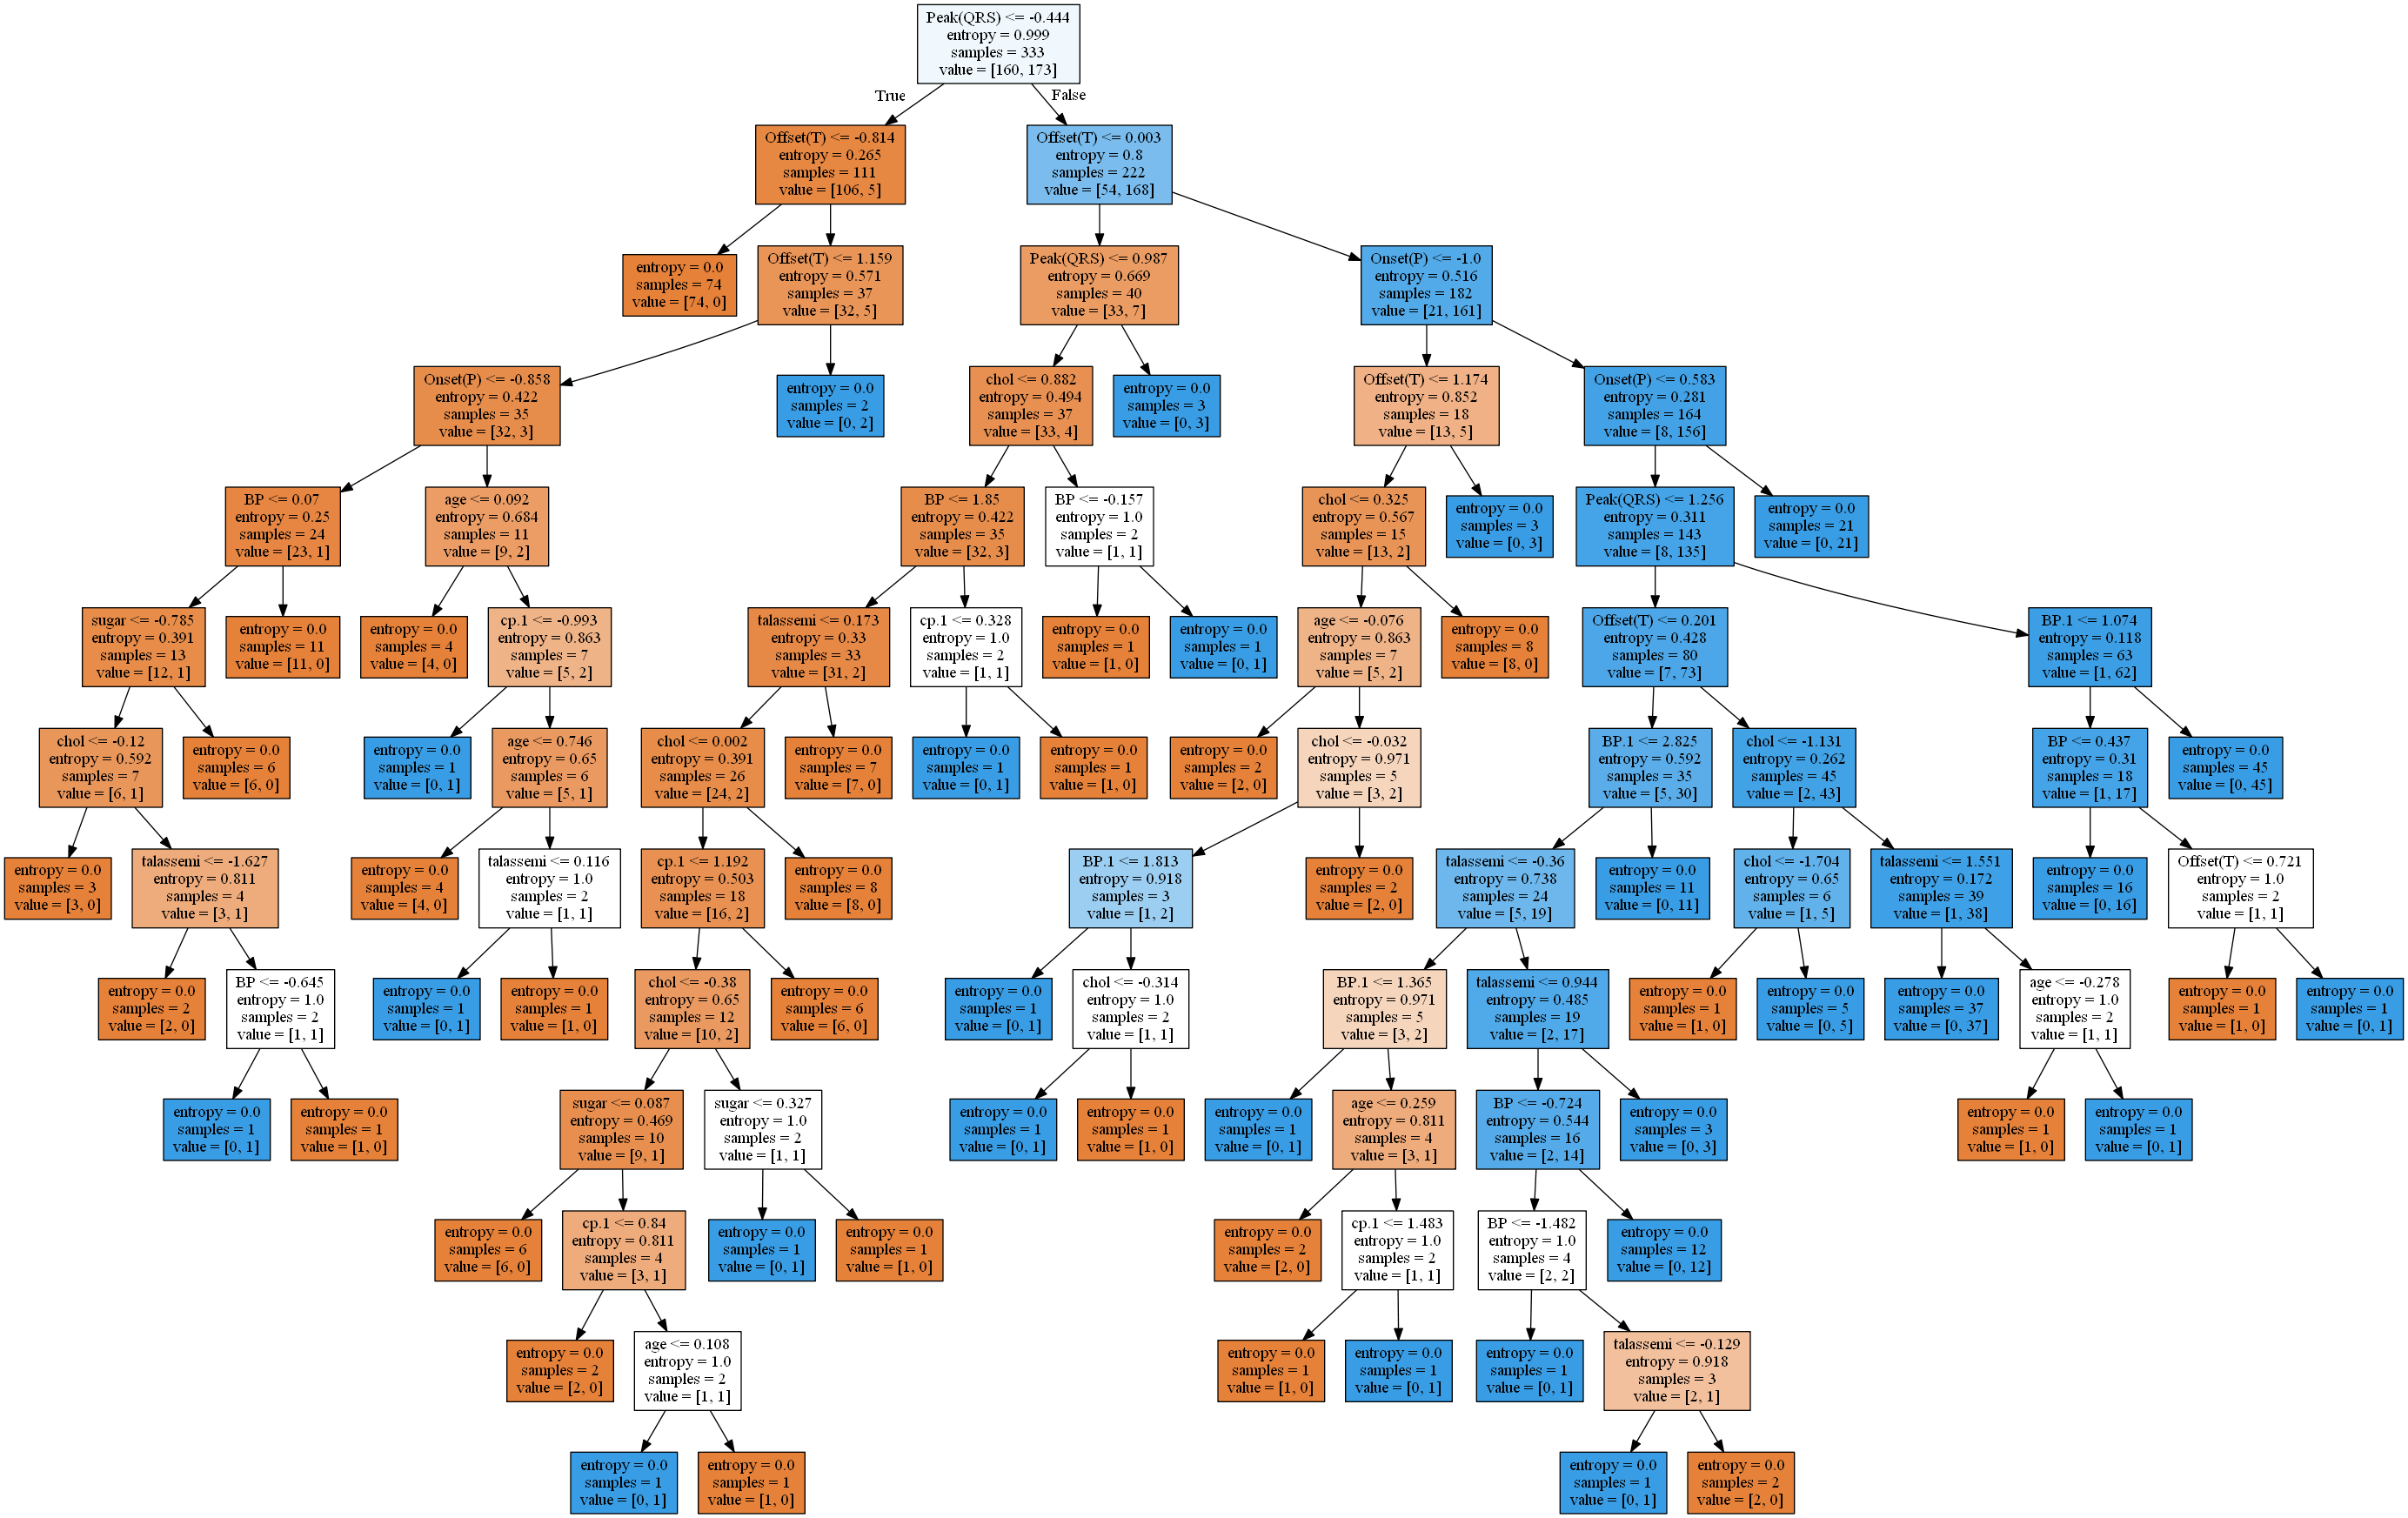

In [118]:
 
 #Text I/O implimentation using an in-memory buffer
dot_data=StringIO()
    
    #Export a decision tree in dot format
    #This function generates a GraphViz representation of the decision.
    #Which is then written into out-file. once exported graphical rendering can be generated. 
tree.export_graphviz(model,out_file=dot_data,feature_names=features,filled=True)
    
    #load graph as defined by data as DOT format. 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    
   #create a PNG/JPEG/GIF image object given raw data.
Image(graph.create_png())
    

In [119]:
from sklearn.tree.export import export_text
r = export_text(model, feature_names=features)
print(r)

|--- Peak(QRS) <= -0.44
|   |--- Offset(T) <= -0.81
|   |   |--- class: 0
|   |--- Offset(T) >  -0.81
|   |   |--- Offset(T) <= 1.16
|   |   |   |--- Onset(P) <= -0.86
|   |   |   |   |--- BP <= 0.07
|   |   |   |   |   |--- sugar <= -0.79
|   |   |   |   |   |   |--- chol <= -0.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- chol >  -0.12
|   |   |   |   |   |   |   |--- talassemi <= -1.63
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- talassemi >  -1.63
|   |   |   |   |   |   |   |   |--- BP <= -0.65
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- BP >  -0.65
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- sugar >  -0.79
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BP >  0.07
|   |   |   |   |   |--- class: 0
|   |   |   |--- Onset(P) >  -0.86
|   |   |   |   |--- age <= 0.09
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  0.09
|   |

In [120]:
df.head()

,age,sex,chol,sugar,Onset(P),Peak(QRS),Offset(T),cp,BP,talassemi,haemorrha,cp.1,BP.1,restecg,thalach,oldpeak,slope,calcium,target
0,70,1,205,1,2,2,2,3,144,2,1,3,144,0,150,2.2,0,1,1
1,65,1,220,1,2,2,2,2,128,1,1,2,128,1,187,3.5,0,1,1
2,56,1,230,0,2,2,2,1,220,2,1,1,220,1,178,1.0,2,0,1
3,57,0,354,1,1,1,2,0,300,1,1,0,300,1,163,0.6,2,0,1
4,22,1,192,0,1,1,2,0,140,1,1,0,140,1,148,0.4,1,0,1


In [123]:
model.predict([[22,0,100,0,0,0,0,0,0,120]])

array([0], dtype=int64)